#### Импортируем библиотеки

In [79]:
import pandas as pd
import pandasql as ps
import matplotlib.pyplot as plt
import seaborn as sns
import statistics 
import numpy

#### Импортируем датасет

In [7]:
pokemons = pd.read_csv('./Dataset/Pokemon.csv')

---

### Сколько % покемонов имеет двойной тип?

#### Формируем запрос и получаем результат

In [155]:
query_one = '''
    SELECT CAST((SELECT COUNT(*) FROM pokemons 
    WHERE "Type 1" IS NOT NULL AND "Type 2" IS NOT NULL) as float) / CAST((SELECT COUNT(*) FROM pokemons) as float) * 100 as procents
    '''
pokemons_task_one = ps.sqldf(query_one, locals())
percents = pokemons_task_one.values.tolist()[0][0]
print(("{0:.2f} %").format(percents))

51.75 %


---

### Сколько всего типов покемонов и какими они бывают?

#### Формируем запрос и получаем результат

In [213]:
query_two_two = '''
    SELECT COUNT(*) as Types FROM (SELECT DISTINCT * FROM (SELECT "Type 1" as Type FROM pokemons UNION SELECT "Type 2" as Type FROM pokemons) WHERE Type IS NOT NULL)
    '''
pokemons_task_two_two = ps.sqldf(query_two_two, locals())


#### Количество типов

In [214]:
pokemons_task_two_two.values.tolist()[0][0]

18

#### Формируем запрос и получаем результат

In [157]:
query_two_one = '''
    SELECT DISTINCT * FROM (SELECT "Type 1" as Type FROM pokemons UNION SELECT "Type 2" as Type FROM pokemons) WHERE Type IS NOT NULL
    '''
pokemons_task_two_one = ps.sqldf(query_two_one, locals())

#### Виды типов:

In [156]:
pokemons_task_two_one

,Type
0,Bug
1,Dark
2,Dragon
3,Electric
4,Fairy
5,Fighting
6,Fire
7,Flying
8,Ghost
9,Grass


---

### У кого лучше общие показатели (Total): у покемонов двойного или одинарного типа?

#### Метод сравнения двух переменных

In [217]:
def comparator(value_one, value_two):
    if value_one > value_two:
        return ("{0:.2f} > {1:.2f}").format(value_one, value_two)
    elif value_one < value_two:
        return ("{0:.2f} < {1:.2f}").format(value_one, value_two)
    else: 
        return ("{0:.2f} = {1:.2f}").format(value_one, value_two)

#### Формируем запросы и получаем результат

In [ ]:
query_three_one = '''
    SELECT (SELECT Sum(Total) FROM pokemons
    WHERE "Type 2" IS NULL) as one_type
    '''
query_three_two = '''
    SELECT (SELECT Sum(Total) FROM pokemons
    WHERE "Type 2" IS NOT NULL) as two_types
    '''
pokemons_task_three_one = ps.sqldf(query_three_one, locals())
pokemons_task_three_two = ps.sqldf(query_three_two, locals())

#### Сравниваем показатели:

In [160]:
print(comparator(pokemons_task_three_two.values.tolist()[0][0], pokemons_task_three_one.values.tolist()[0][0]))

189044.00 > 159038.00


#### Итог: лучше общие показатели у покемонов двойного типа

#### т.е. лучше общие показатели у покемонов двойного типа
---

### У кого лучше средний показатель Защита (Defense): у покемонов типа Grass или у покемонов типа Fairy? (покемоны двойного типа учитываются)

In [218]:
query_four_one = '''
    SELECT (SELECT Avg(Defense) FROM pokemons
    WHERE "Type 1" IS "Grass" OR "Type 2" IS "Grass") as grass_type
    '''
query_four_two = '''
    SELECT (SELECT Avg(Defense) FROM pokemons
    WHERE "Type 1" IS "Fairy" OR "Type 2" IS "Fairy") as fairy_type
    '''
pokemons_task_four_one = ps.sqldf(query_four_one, locals())
pokemons_task_four_two = ps.sqldf(query_four_two, locals())
print(comparator(pokemons_task_four_one.values.tolist()[0][0], pokemons_task_four_two.values.tolist()[0][0]))

73.25 > 70.40


### т.е. лучше средний показатель у покемонов типа Grass
---

## Мы полагаем, что среднестатистический легендарный покемон должен быть сильнее, чем среднестатистический нелегендарный. Подтвердите или опровергните это предположение.

In [144]:
query_five_one = '''
    SELECT (SELECT Avg(Total) FROM pokemons
    WHERE Legendary == True) as legendary_pokemons
    '''
query_five_two = '''
    SELECT (SELECT Avg(Total) FROM pokemons
    WHERE Legendary == False) as unlegendary_pokemons
    '''
pokemons_task_five_one = ps.sqldf(query_five_one, locals())
pokemons_task_five_two = ps.sqldf(query_five_two, locals())
print(comparator(pokemons_task_five_one.values.tolist()[0][0], pokemons_task_five_two.values.tolist()[0][0]))

637.38 > 417.21


### Да, предположение верно
---

## Покажите все случаи (пары покемонов), когда легендарный покемон по показателю Total оказался слабее, чем нелегендарный. Сколько таких случаев?

#### Пары покемонов:

In [106]:
query_six = '''
    Select leg_name, unleg_name FROM (SELECT Name as leg_name, Total as leg_total FROM pokemons
    WHERE Legendary == True ) as leg_poke
    Right Join
    (SELECT Name as unleg_name, Total as unleg_total FROM pokemons
    WHERE Legendary == False) as unleg_poke 
    WHERE leg_total < unleg_total
    '''
pokemons_task_six = ps.sqldf(query_six, locals())
pokemons_task_six

,leg_name,unleg_name
0,Articuno,AbomasnowMega Abomasnow
1,Articuno,AerodactylMega Aerodactyl
2,Articuno,AggronMega Aggron
3,Articuno,AlakazamMega Alakazam
4,Articuno,AltariaMega Altaria
...,...,...
1260,Volcanion,Slaking
1261,Volcanion,SteelixMega Steelix
1262,Volcanion,SwampertMega Swampert
1263,Volcanion,TyranitarMega Tyranitar


#### Количество таких случаев

In [179]:
print(len(pokemons_task_six_one.values.tolist()))

1265


---

### Для каждой пары, в которой нелегендарный покемон оказывается сильнее легендарного посчитайте разницу в показателе Total. Постройте гистограму полученной величины. Похоже ли распределение на нормальное? Рассчитайте среднее арифметическое, медиану и моду данной величины.

<Axes: xlabel='total', ylabel='Count'>

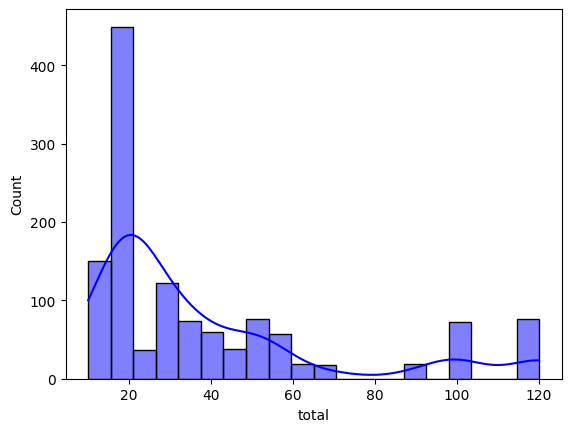

In [72]:
query_seven = '''
    Select (unleg_total - leg_total) as total FROM (SELECT Name as leg_name, Total as leg_total FROM pokemons
    WHERE Legendary == True ) as leg_poke
    Right Join
    (SELECT Name as unleg_name, Total as unleg_total FROM pokemons
    WHERE Legendary == False) as unleg_poke 
    WHERE leg_total < unleg_total
    '''
pokemons_task_seven = ps.sqldf(query_seven, locals())
sns.histplot(pokemons_task_seven['total'], kde=True, 
              color = 'blue')

#### Среднее арифметическое:

In [102]:
print("{0:.2f}".format(statistics.mean(pokemons_task_seven['total'].values.tolist())))

38.75


#### Медиана:

In [103]:
print("{0:.2f}".format(statistics.median(pokemons_task_seven['total'].values.tolist())))

25.00


#### Мода:

In [104]:
print("{0:.2f}".format(statistics.mode(pokemons_task_seven['total'].values.tolist())))

20.00


#### Полученное распределение не является нормальным (Мода < Медианы < Ср.Арифметического)
---

### Назовите две характеристики покемонов, которые коррелируют в наименьшей степени.

#### Измерять степень корреляции мы будем с помощью коэфициента Пирсона:

$$ r = \frac{\Sigma(x-\neg{x})(y-\neg{y})}{\sqrt{\Sigma(x-\neg{x})^2\Sigma(y-\neg{y})^2}} $$

#### Коэффициент корреляции HP

In [185]:
print("{0:.2f}".format(pokemons['Total'].corr(pokemons['HP'])))

0.62


#### Коэффициент корреляции Attack

In [184]:
print("{0:.2f}".format(pokemons['Total'].corr(pokemons['Attack'])))

0.74


#### Коэффициент корреляции Defense

In [186]:
print("{0:.2f}".format(pokemons['Total'].corr(pokemons['Defense'])))

0.61


#### Коэффициент корреляции Sp. Atk

In [193]:
print("{0:.2f}".format(pokemons['Total'].corr(pokemons['Sp. Atk'])))

0.75


#### Коэффициент корреляции Sp. Def

In [195]:
print("{0:.2f}".format(pokemons['Total'].corr(pokemons['Sp. Def'])))

0.72


#### Коэффициент корреляции Speed

In [196]:
print("{0:.2f}".format(pokemons['Total'].corr(pokemons['Speed'])))

0.58


#### Из полученных значений можем сделать вывод, что наименее коррелируют характеристики Defense и Speed
---

### Что делает покемона легендарным, кроме суммы характеристик? Важнее сила атаки или сила защиты, а может сила специальной атаки или сила специальной защиты, или скорость, или здоровье? А может важна уникальность типа или поколение покемона? Подкрепите свое мнение расчетами.

#### Измерять степень влияния характеристик на легендарность мы будем также с помощью коэффициента корреляции.

In [198]:
query_nine = '''
    SELECT * FROM pokemons
    WHERE Legendary IS True
    '''
pokemons_task_nine_one = ps.sqldf(query_nine, locals())

#### Коэффициент корреляции HP:

In [200]:
print("{0:.2f}".format(pokemons_task_nine_one['Total'].corr(pokemons_task_nine_one['HP'])))

0.45


#### Коэффициент корреляции Attack:

In [201]:
print("{0:.2f}".format(pokemons_task_nine_one['Total'].corr(pokemons_task_nine_one['Attack'])))

0.67


#### Коэффициент корреляции Defense:

In [202]:
print("{0:.2f}".format(pokemons_task_nine_one['Total'].corr(pokemons_task_nine_one['Defense'])))

0.11


#### Коэффициент корреляции Sp. Atk:

In [203]:
print("{0:.2f}".format(pokemons_task_nine_one['Total'].corr(pokemons_task_nine_one['Sp. Atk'])))

0.61


#### Коэффициент корреляции Sp. Def:

In [204]:
print("{0:.2f}".format(pokemons_task_nine_one['Total'].corr(pokemons_task_nine_one['Sp. Def'])))

0.19


#### Коэффициент корреляции Speed:

In [205]:
print("{0:.2f}".format(pokemons_task_nine_one['Total'].corr(pokemons_task_nine_one['Speed'])))

0.14


#### Влияние поколения и типа на легендарность мы сможем с помощью графиков

<Axes: xlabel='Generation', ylabel='Total'>

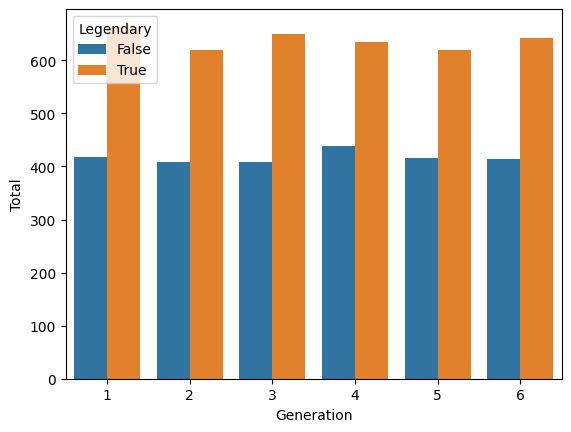

In [173]:
pokemons_task_nine_two = pokemons.groupby(['Generation', 'Legendary']).agg(Total=("Total", 'mean')) 

sns.barplot(x="Generation", 
           y="Total", 
           hue="Legendary", 
           data=pokemons_task_nine_two)

##### График влияния поколения на легендарность

<Axes: xlabel='Total', ylabel='Type 1'>

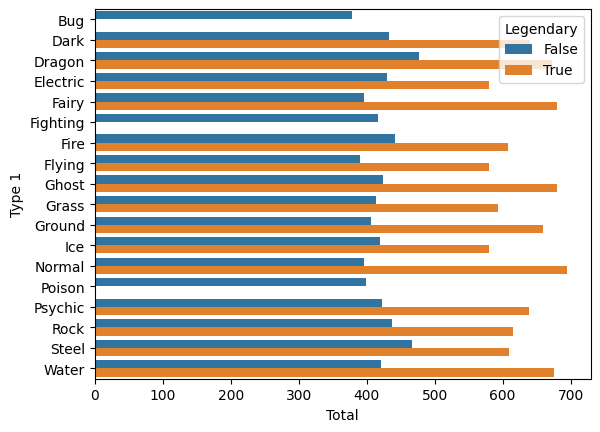

In [210]:
pokemons_task_nine_three = pokemons.groupby(['Type 1', 'Legendary']).agg(Total=("Total", 'mean')) 

sns.barplot(y="Type 1", 
           x="Total", 
           hue="Legendary", 
           data=pokemons_task_nine_three)

##### График влияния типа на легендарность

<Axes: xlabel='Count', ylabel='Type 1'>

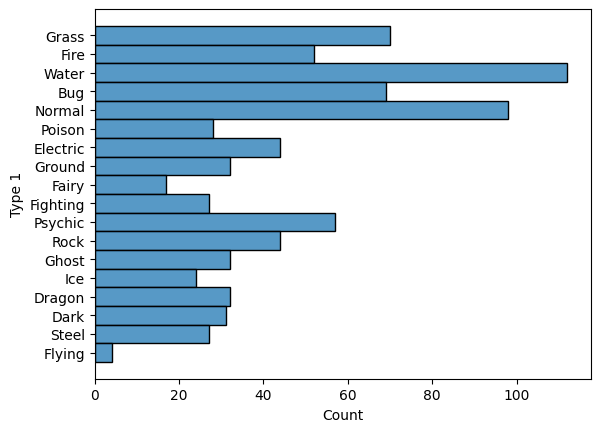

In [182]:
sns.histplot(y = pokemons['Type 1'])

##### График уникальности типов

#### Для наглядности отличия характеристик обычных покемонов и легендарных были созданны несколько чартов в Datalens. Ссылка на дашборд: [*тык*](https://datalens.yandex/59cnteymnn50s)

#### Из полученных данных можем сделать вывод, что на легендарность влияют как общее повышение суммы характеристик Total, так и увеличенное влияние таких характеристик как HP, Attack и Sp. Atk.